## shortwave variables (SW)

Developent of mse

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \hat{h^ \prime} \ \text{NetLW} + \hat{h^ \prime} \ \text{SEF} + \hat{h^ \prime} \ \textcolor{lightblue}{\text{NetSW}} - \hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}$

$\textcolor{lightblue}{\text{NetSW}} = \textcolor{lightblue}{\text{rsdt}} + \textcolor{lightblue}{\text{rsus}} - \textcolor{lightblue}{\text{rsds}} - \textcolor{lightblue}{\text{rsut}}$

1. rsut  -  radiation shortwave upwelling toa
2. rsus  –  radiation shortwave upwelling surface
3. rsds  –  radiation shortwave downwelling surface
4. (rsdt –  radiation shortwave downwelling toa (calculate))

<br />

In [1]:
import intake
import xarray as xr
import xesmf as xe

import numpy as np
import skimage.measure as skm

import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os
import myFuncs
import myPlots

In [2]:
model='MPI-ESM1-2-HR'
experiment_id='historical'
period = slice('1970-01-01','1999-12-31')
member_id='r1i1p1f1'

## rsut  -  radiation shortwave upwelling toa

In [4]:
table_id='E3hr'
variable_id = 'rsut'
ds_dict= intake.cat.nci['esgf'].cmip6.search(
                                source_id=model, 
                                experiment_id=experiment_id, 
                                member_id=member_id, 
                                variable_id=variable_id, 
                                table_id=table_id).to_dataset_dict()

ds = ds_dict[list(ds_dict.keys())[-1]].sel(time=period, lon=slice(0,365),lat=slice(-30,30))

In [ ]:
ds

In [8]:
rsut_3hr=ds.rsut
rsut_3hr

<xarray.DataArray 'rsut' (time: 73040, lat: 64, lon: 384)>
dask.array<getitem, shape=(73040, 64, 384), dtype=float32, chunksize=(14608, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T01:30:00 ... 1999-12-31T22:30:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  toa_outgoing_shortwave_flux
    long_name:      TOA Outgoing Shortwave Radiation
    comment:        at the top of the atmosphere
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:09Z altered by CMOR: Changed sign. 2019-...

In [9]:
rsut = rsut_3hr.resample(time='1D').mean(dim='time', keep_attrs=True)
rsut

<xarray.DataArray 'rsut' (time: 10957, lat: 64, lon: 384)>
dask.array<where, shape=(10957, 64, 384), dtype=float32, chunksize=(1828, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Attributes:
    standard_name:  toa_outgoing_shortwave_flux
    long_name:      TOA Outgoing Shortwave Radiation
    comment:        at the top of the atmosphere
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:09Z altered by CMOR: Changed sign. 2019-...

In [10]:
rsut_test=rsut.isel(time=slice(0, 4))

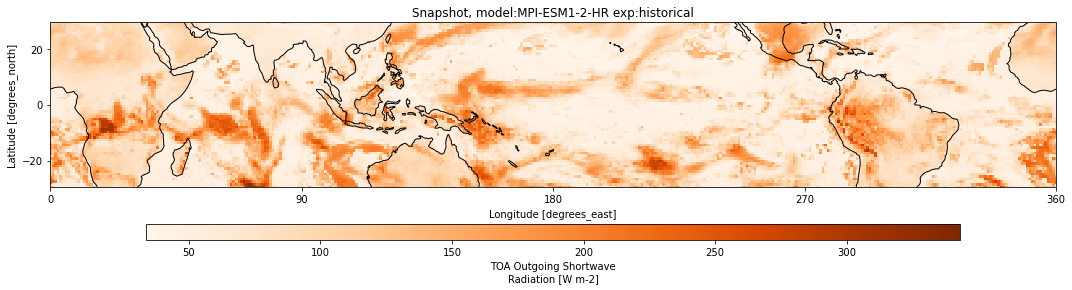

In [11]:
myPlots.plot_snapshot(rsut.isel(time=0), 'Oranges')

In [ ]:
del ds
del rsut

## rsus  –  radiation shortwave upwelling surface

In [13]:
table_id='3hr'
variable_id = 'rsus'
ds_dict= intake.cat.nci['esgf'].cmip6.search(
                                source_id=model, 
                                experiment_id=experiment_id, 
                                member_id=member_id, 
                                variable_id=variable_id, 
                                table_id=table_id).to_dataset_dict()

ds = ds_dict[list(ds_dict.keys())[-1]].sel(time=period, lon=slice(0,365),lat=slice(-30,30))

In [17]:
rsus_3hr=ds.rsus
rsus_3hr

<xarray.DataArray 'rsus' (time: 87656, lat: 64, lon: 384)>
dask.array<getitem, shape=(87656, 64, 384), dtype=float32, chunksize=(14616, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T01:30:00 ... 1999-12-31T22:30:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  surface_upwelling_shortwave_flux_in_air
    long_name:      Surface Upwelling Shortwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:05Z altered by CMOR: Changed sign. 2019-...

In [18]:
rsus = rsus_3hr.resample(time='1D').mean(dim='time', keep_attrs=True)
rsus

<xarray.DataArray 'rsus' (time: 10957, lat: 64, lon: 384)>
dask.array<stack, shape=(10957, 64, 384), dtype=float32, chunksize=(1, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Attributes:
    standard_name:  surface_upwelling_shortwave_flux_in_air
    long_name:      Surface Upwelling Shortwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:05Z altered by CMOR: Changed sign. 2019-...

In [19]:
rsus_test=rsus.isel(time=slice(0, 4))
rsus_test

<xarray.DataArray 'rsus' (time: 4, lat: 64, lon: 384)>
dask.array<getitem, shape=(4, 64, 384), dtype=float32, chunksize=(1, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 1970-01-03 1970-01-04
Attributes:
    standard_name:  surface_upwelling_shortwave_flux_in_air
    long_name:      Surface Upwelling Shortwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:05Z altered by CMOR: Changed sign. 2019-...

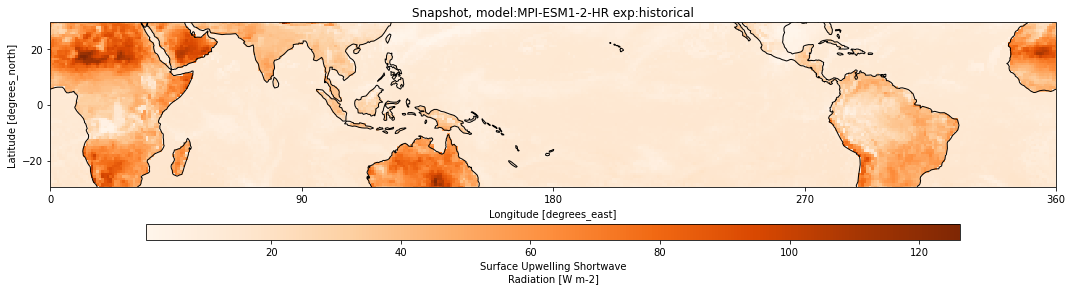

In [20]:
myPlots.plot_snapshot(rsus.isel(time=0), 'Oranges')

In [21]:
del ds
del rsus

## rsds  –  radiation shortwave downwelling surface

In [22]:
table_id='3hr'
variable_id = 'rsds'
ds_dict= intake.cat.nci['esgf'].cmip6.search(
                                source_id=model, 
                                experiment_id=experiment_id, 
                                member_id=member_id, 
                                variable_id=variable_id, 
                                table_id=table_id).to_dataset_dict()

ds = ds_dict[list(ds_dict.keys())[-1]].sel(time=period, lon=slice(0,360),lat=slice(-30,30))

In [25]:
ds

<xarray.Dataset>
Dimensions:    (time: 482120, bnds: 2, lat: 192, lon: 384)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-01T01:30:00 ... 2014-12-31T22:30:00
  * lat        (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(14608, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 -89.75 -88.82 -88.82 ... 88.82 88.82 89.75
    lon_bnds   (lon, bnds) float64 -0.4688 0.4688 0.4688 ... 358.6 358.6 359.5
    rsds       (time, lat, lon) float32 dask.array<chunksize=(14608, 192, 384), meta=np.ndarray>
Attributes: (12/49)
    title:                   MPI-ESM1-2-HR output prepared for CMIP6
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    forcing_index:           1
    parent_source_id:        MPI-ESM1-2-HR
    variant_label:           r1i1p1f1
    sub_experiment_id:       none
    ...                      ...
    physics_index:           1
    tracking_id:             hdl:21.14100/3c58a4bf-1ca7-46b0-8731-350329d09ea...
    source:                  MPI-ESM1.2-HR (2017): \naerosol: none, prescribe...
    parent_experiment_id:    piControl
    product:                 model-output
    intake_esm_dataset_key:  CMIP6.CMIP.MPI-M.MPI-ESM1-2-HR.historical.r1i1p1...

In [26]:
rsds_3hr=ds.rsds
rsds_3hr

<xarray.DataArray 'rsds' (time: 87656, lat: 64, lon: 384)>
dask.array<getitem, shape=(87656, 64, 384), dtype=float32, chunksize=(14616, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T01:30:00 ... 1999-12-31T22:30:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  surface_downwelling_shortwave_flux_in_air
    long_name:      Surface Downwelling Shortwave Radiation
    comment:        Surface solar irradiance for UV calculations.
    units:          W m-2
    original_name:  rsds
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:04Z altered by CMOR: replaced missing va...

In [27]:
rsds = rsds_3hr.resample(time='1D').mean(dim='time', keep_attrs=True)
rsds

<xarray.DataArray 'rsds' (time: 10957, lat: 64, lon: 384)>
dask.array<stack, shape=(10957, 64, 384), dtype=float32, chunksize=(1, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Attributes:
    standard_name:  surface_downwelling_shortwave_flux_in_air
    long_name:      Surface Downwelling Shortwave Radiation
    comment:        Surface solar irradiance for UV calculations.
    units:          W m-2
    original_name:  rsds
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:04Z altered by CMOR: replaced missing va...

In [28]:
rsds_test=rsds.isel(time=slice(0, 4))
rsds_test

<xarray.DataArray 'rsds' (time: 87656, lat: 64, lon: 384)>
dask.array<getitem, shape=(87656, 64, 384), dtype=float32, chunksize=(14616, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T01:30:00 ... 1999-12-31T22:30:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  surface_downwelling_shortwave_flux_in_air
    long_name:      Surface Downwelling Shortwave Radiation
    comment:        Surface solar irradiance for UV calculations.
    units:          W m-2
    original_name:  rsds
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:04Z altered by CMOR: replaced missing va...

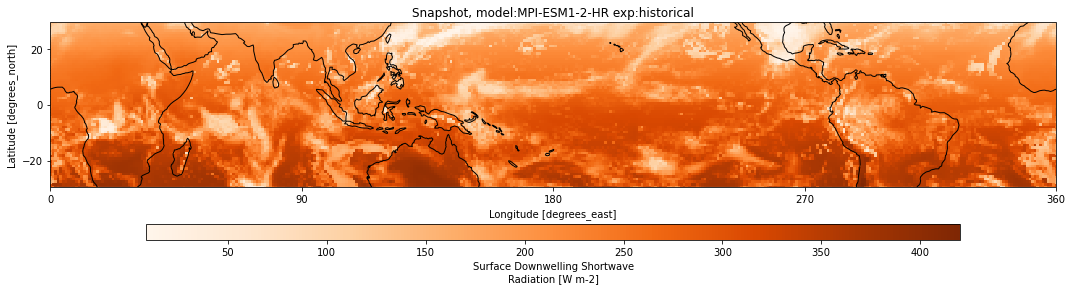

In [29]:
myPlots.plot_snapshot(rsds.isel(time=0), 'Oranges')

## rsdt -radiation shortwave downwelling toa

## sw

In [ ]:
netsw_test = rsds_test + rsus_test - rsut_test

In [ ]:
netsw = rsds + rsus - rsut

In [ ]:
netsw_tMean = netsw.mean(dim = 'time', keep_attrs=True)

In [ ]:
aWeights = np.cos(np.deg2rad(netsw.lat))
netsw_sMean = netsw.weighted(aWeights).mean(dim=('lat','lon'), keep_attrs=True)

In [ ]:
netsw_anom = netsw - netsw_sMean

## saving

In [ ]:
# shortwave radiation test
save = True
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    fileName = model + '_sw_test_' + experiment_id + '.nc' 
    dataSet = xr.Dataset({'netsw_test': netsw_test, 
                'rsut_test': rsut_test, 
                'rsds_test': rsds_test,
                'rsus_test': rsus_test})

    myFuncs.save_file(dataSet, folder, fileName)

In [ ]:
# shortwave radiation tMean
save = True
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    fileName = model + '_sw_tMean_' + experiment_id + '.nc'
    dataSet = xr.Dataset({'netsw_tMean': netsw_tMean})

    myFuncs.save_file(dataSet, folder, fileName)

In [ ]:
# shortwave radiation anomaly from mean
save = True
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    fileName = model + '_sw_anom_' + experiment_id + '.nc'
    dataSet = xr.Dataset({
            'netsw_anom': netsw_anom.weighted(aWeights).mean(dim=('lat','lon'), keep_attrs=True),
            'netsw_sMean': netsw_sMean})

    myFuncs.save_file(dataSet, folder, fileName)

## testing